In [17]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

Correção

Equinócio de Primavera - 21/setembro

In [18]:
Mes=9     #Setembro
Dia=21     #dia da semana
Cor=3    #corre
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude

numero de dias do ano 

In [19]:
n= Dia + (Mes -1)*30 +Cor
n

264

HORA SOLAR 

In [20]:
B= (360/364)*(n-81)
B

180.989010989011

In [21]:
E= 9.87*np.sin(np.radians(2*B))-7.53*np.cos(np.radians(B))-1.5*np.sin(np.radians(B))

E

7.895443464016701

In [22]:

Corhora= (4*(L_O-L)+E)/60


In [23]:
df=pd.read_csv("Hora Legal.csv" , encoding ='UTF-8' , sep=";")



In [24]:

df['HS']= df['HL']+Corhora


ANGULO HORARIO 

In [25]:

df['Omega']= (df['HS']-12)*15


DECLINAÇÃO SOLAR 

In [26]:

sigma= 23.45*np.sin(np.radians(360/365*(284+n)))
sigma

-0.20183407703972808

ANGULO ZENITAL

In [27]:

df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(sigma))*np.sin(np.radians(L_a))+np.cos(np.radians(sigma))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega']))))



In [28]:
df['Sombra']=np.tan(np.radians(df['teta_z']))
df


,HL,HS,Omega,teta_z,Sombra
0,5.00,5.240844,-101.387339,100.345833,-5.477733
1,5.50,5.740844,-93.887339,93.482348,-16.432937
2,5.99,6.230844,-86.537339,86.745274,17.584933
3,6.50,6.740844,-78.887339,79.741256,5.525257
4,7.00,7.240844,-71.387339,72.902790,3.251114
5,7.50,7.740844,-63.887339,66.115916,2.258322
6,8.00,8.240844,-56.387339,59.410893,1.691642
7,8.50,8.740844,-48.887339,52.829785,1.318874
8,9.00,9.240844,-41.387339,46.434886,1.051385
9,9.50,9.740844,-33.887339,40.323406,0.848764


In [29]:
sombra=df.loc[2:25]
sombra


,HL,HS,Omega,teta_z,Sombra
2,5.99,6.230844,-86.537339,86.745274,17.584933
3,6.50,6.740844,-78.887339,79.741256,5.525257
4,7.00,7.240844,-71.387339,72.902790,3.251114
5,7.50,7.740844,-63.887339,66.115916,2.258322
6,8.00,8.240844,-56.387339,59.410893,1.691642
7,8.50,8.740844,-48.887339,52.829785,1.318874
8,9.00,9.240844,-41.387339,46.434886,1.051385
9,9.50,9.740844,-33.887339,40.323406,0.848764
10,10.00,10.240844,-26.387339,34.653203,0.691225
11,10.50,10.740844,-18.887339,29.684855,0.570040


<AxesSubplot:xlabel='HL'>

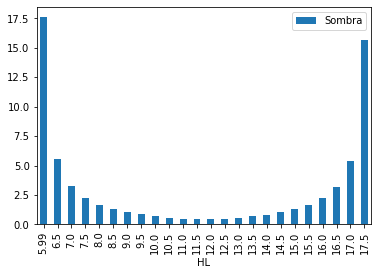

In [30]:
sombra.plot.bar(y='Sombra',x='HL')

ANGULO DO AZIMUTE SOLAR

df['Gama_s']= np.degrees(np.arccos(np.radians(((np.cos(np.radians(df['teta_z'])))* (np.sin(np.radians(df['Omega'])))-(np.sin(np.radians(df['sigma']))))/((np.sin(np.radians(df['teta_z'])))*np.cos(np.radians(df['teta_z']))))))


ANGULO DE INCIDÊNCIA 

df['teta']=(np.sin(np.radians(df['sigma'])))*(np.sin(np.radians(L_a)))
